In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb

https://forecastegy.com/posts/xgboost-binary-classification-python/

In [6]:
# Load the data
data_with_coords = pd.read_csv('D:/!!Research/rgee_test/GEE_LPC/point_data/ground_truthing/dunbar/dunbar_multiclass_env_data.csv')
data = data_with_coords.drop(columns = ['latitude', 'longitude', 'system:index', 'shrub_type'])
# Display the first few rows of the data
data.head()

bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200   clay_0_5  \
0  1.427756  1.440753  1.480302   1.49402   1.490098    1.497902  16.804304   
1  1.427756  1.440753  1.480302   1.49402   1.490098    1.497902  16.804304   
2  1.427756  1.440753  1.480302   1.49402   1.490098    1.497902  16.804304   
3  1.427756  1.440753  1.480302   1.49402   1.490098    1.497902  16.804304   
4  1.427756  1.440753  1.480302   1.49402   1.490098    1.497902  16.804304   

   clay_5_15  clay_15_30  clay_30_60  ...  theta_s_5_15  theta_s_15_30  \
0  17.174805   16.488293   12.789346  ...     17.174805      16.488293   
1  17.174805   16.488293   12.789346  ...     17.174805      16.488293   
2  17.174805   16.488293   12.789346  ...     17.174805      16.488293   
3  17.174805   16.488293   12.789346  ...     17.174805      16.488293   
4  17.174805   16.488293   12.789346  ...     17.174805      16.488293   

   theta_s_30_60  theta_s_60_100  theta_s_100_200       bio12       bio07  \
0      12.789346       11.779297        10.522483  476.001678  369.470367   
1      12.789346       11.779297        10.522483  475.989777  369.486938   
2      12.789346       11.779297        10.522483  475.919556  369.484711   
3      12.789346       11.779297        10.522483  475.989777  369.486938   
4      12.789346       11.779297        10.522483  475.904816  369.504394   

   dist_drain  dist_road  grnd_truth  
0  112.787904   7.162311           1  
1  134.371841  29.666306           1  
2  113.114225  12.116007           1  
3  134.371841  29.666306           1  
4  129.330805  31.431403           1  

[5 rows x 59 columns]

In [7]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = data.drop('grnd_truth', axis=1)
y = data['grnd_truth']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42) #test size orginally 0.3

In [8]:
# Now you can get the indices of the rows in the original dataset
train_indices = X_train.index.tolist()
test_indices = X_test.index.tolist()

testing_df = data.loc[test_indices]
#print("Training set indices:", train_indices)
print("\nTesting set:")
testing_df.head()


Testing set:


bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200   clay_0_5  \
87   1.427756  1.440753  1.480302  1.494020   1.490098    1.497902  16.804304   
252  1.427756  1.440753  1.480302  1.494020   1.490098    1.497902  16.804304   
221  1.462023  1.484751  1.494668  1.496445   1.500274    1.527969  11.029411   
440  1.396074  1.387282  1.375083  1.343665   1.347871    1.372893  22.492172   
349  1.427756  1.440753  1.480302  1.494020   1.490098    1.497902  16.804304   

     clay_5_15  clay_15_30  clay_30_60  ...  theta_s_5_15  theta_s_15_30  \
87   17.174805   16.488293   12.789346  ...     17.174805      16.488293   
252  17.174805   16.488293   12.789346  ...     17.174805      16.488293   
221  11.132553   13.630859   20.074219  ...     11.132553      13.630859   
440  22.642717   22.338551   23.195694  ...     22.642717      22.338551   
349  17.174805   16.488293   12.789346  ...     17.174805      16.488293   

     theta_s_30_60  theta_s_60_100  theta_s_100_200       bio12       bio07  \
87       12.789346       11.779297        10.522483  475.799377  369.550201   
252      12.789346       11.779297        10.522483  475.783478  369.572418   
221      20.074219       24.390732        25.289268  477.861176  369.224457   
440      23.195694       24.818048        22.064152  476.288696  369.463043   
349      12.789346       11.779297        10.522483  475.705353  369.581604   

     dist_drain   dist_road  grnd_truth  
87   128.241546   55.005024           1  
252  142.390117   74.791364           0  
221  654.286140  570.084144           1  
440   22.164294  112.888691           2  
349  122.044736   50.639817           2  

[5 rows x 59 columns]

https://www.youtube.com/watch?v=GrJP9FLV3FE

https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-using-xgboost

https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27 \
https://notebook.community/slundberg/shap/notebooks/tree_explainer/Census%20income%20classification%20with%20XGBoost

In [11]:
from xgboost import XGBClassifier
#stq_model = XGBClassifier(objective='binary:logistic', seed = 42)
stq_model = XGBClassifier(objective = 'multi:softmax', seed = 42)
stq_model.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'mlogloss', eval_set = [(X_test, y_test)])

[0]	validation_0-mlogloss:0.91276
[1]	validation_0-mlogloss:0.81050
[2]	validation_0-mlogloss:0.74595
[3]	validation_0-mlogloss:0.70801
[4]	validation_0-mlogloss:0.68477
[5]	validation_0-mlogloss:0.67142
[6]	validation_0-mlogloss:0.66259
[7]	validation_0-mlogloss:0.65811
[8]	validation_0-mlogloss:0.65475
[9]	validation_0-mlogloss:0.65559
[10]	validation_0-mlogloss:0.65550
[11]	validation_0-mlogloss:0.65688
[12]	validation_0-mlogloss:0.65749
[13]	validation_0-mlogloss:0.66066
[14]	validation_0-mlogloss:0.66558
[15]	validation_0-mlogloss:0.66869
[16]	validation_0-mlogloss:0.67137
[17]	validation_0-mlogloss:0.67361


C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

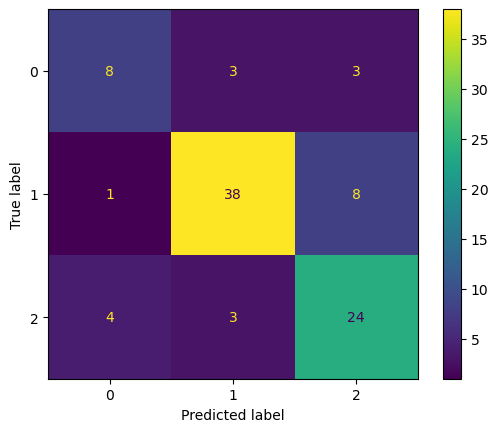

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model, X_test, y_test)

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid_1 = {
    "max_depth" : [3, 4, 5],
    "learning_rate" : [0.1, 0.01, 0.05],
    "gamma" : [0, 0.25, 1.0],
    "reg_lambda" : [0, 1.0, 10],
    "scale_pos_weight" : [1, 3, 5],
    "eta": [0.01, 0.05, 0.1]
}
""" # the original
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.5, 1],
    "gamma" : [1, 5, 10],
    "reg_lambda" : [10, 20, 50],
    "scale_pos_weight" : [3],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}
"""
# the new one to test
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.01, 0.001],
    "gamma" : [1, 5, 10],
    "reg_lambda" : [10, 20, 50],
    "scale_pos_weight" : [2.95],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}

optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic',
                             seed = 42,
                             subsample = 0.7,
                             colsample_bytree = 0.5),
    param_grid = param_grid_2,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, y_train, verbose = False, early_stopping_rounds = 10, eval_metric = 'auc', eval_set = [(X_test, y_test)])
print(optimal_params.best_params_)

{'eta': 0.01, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 20, 'scale_pos_weight': 2.95}


C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [13]:
#compare to xgboost_env_test notebook
#https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c
stq_model_2 = XGBClassifier(objective='multi:softmax', 
                            seed = 42, 
                            max_depth = 7, # how deep the tree will go -- originally 4
                            learning_rate = 0.1, # also known as eta
                            gamma = 1, # originally 0.25
                            reg_lambda = 20, # was set to 1
                            scale_pos_weight = 2.95, #sum(negative instances) / sum(positive instances) - was set to 5 originally
                            subsample = 0.7,) # was set to .5 initially. Should be 0.5 or greater
                            #base_score = np.mean(y_train))
stq_model_2.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'mlogloss', eval_set = [(X_test, y_test)])

[0]	validation_0-mlogloss:1.06274
[1]	validation_0-mlogloss:1.02777
[2]	validation_0-mlogloss:0.99942
[3]	validation_0-mlogloss:0.97048
[4]	validation_0-mlogloss:0.94566
[5]	validation_0-mlogloss:0.92557
[6]	validation_0-mlogloss:0.90510
[7]	validation_0-mlogloss:0.88887
[8]	validation_0-mlogloss:0.87231
[9]	validation_0-mlogloss:0.85638
[10]	validation_0-mlogloss:0.84213
[11]	validation_0-mlogloss:0.82835
[12]	validation_0-mlogloss:0.81814
[13]	validation_0-mlogloss:0.80998
[14]	validation_0-mlogloss:0.80140
[15]	validation_0-mlogloss:0.79126
[16]	validation_0-mlogloss:0.78295
[17]	validation_0-mlogloss:0.77666
[18]	validation_0-mlogloss:0.76973
[19]	validation_0-mlogloss:0.76472
[20]	validation_0-mlogloss:0.75818
[21]	validation_0-mlogloss:0.75174
[22]	validation_0-mlogloss:0.74892
[23]	validation_0-mlogloss:0.74366
[24]	validation_0-mlogloss:0.74011
[25]	validation_0-mlogloss:0.73471
[26]	validation_0-mlogloss:0.73195
[27]	validation_0-mlogloss:0.72927
[28]	validation_0-mlogloss:0.7

C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:57:24] WARNING: D:\bld\xgboost-split_1705650032250\work\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

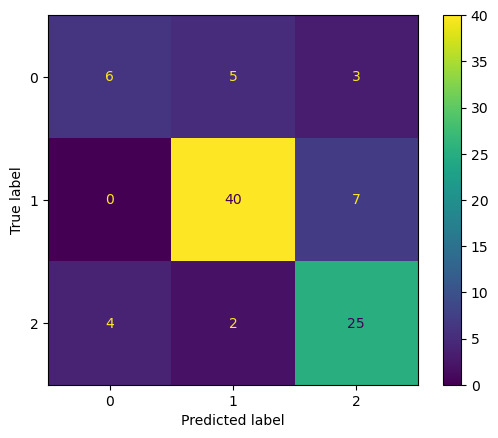

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model_2, X_test, y_test)

In [15]:
# Calculate accuracy
accuracy = stq_model_2.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.17%


In [16]:
y_pred = stq_model_2.predict(X_test)
y_pred_proba = stq_model_2.predict_proba(X_test)

## Finding and exporting the correctly and incorrectly testing data

In [35]:
# Make predictions on the test dataset
y_pred = stq_model_2.predict(X_test)

# Compare the predicted labels with the actual labels
correctly_predicted_indices = (y_pred == y_test)
incorrectly_predicted_indices = ~correctly_predicted_indices

# Extract rows with correct and incorrect predictions
correctly_predicted_rows = X_test[correctly_predicted_indices]
incorrectly_predicted_rows = X_test[incorrectly_predicted_indices]

# Filter original target binary classification data
original_target_correct = y_test[correctly_predicted_indices]
original_target_incorrect = y_test[incorrectly_predicted_indices]

# Concatenate original target with correctly and incorrectly predicted rows
correctly_predicted_rows_with_target = pd.concat([correctly_predicted_rows, original_target_correct], axis=1)
incorrectly_predicted_rows_with_target = pd.concat([incorrectly_predicted_rows, original_target_incorrect], axis=1)

print("Rows predicted correctly with original target:")
print(correctly_predicted_rows_with_target)

print("\nRows predicted incorrectly with original target:")
print(incorrectly_predicted_rows_with_target)

Rows predicted correctly with original target:
        bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200  \
1529  1.589609  1.577473  1.530567  1.513699   1.523548    1.577266   
330   1.501241  1.505308  1.516810  1.526426   1.500391    1.409395   
455   1.391603  1.397505  1.415122  1.446934   1.467109    1.568337   
397   1.461309  1.486341  1.500313  1.496673   1.493665    1.528612   
975   1.408537  1.402480  1.390137  1.408201   1.468146    1.440381   
...        ...       ...       ...       ...        ...         ...   
1462  1.350820  1.389238  1.404776  1.418164   1.430449    1.445503   
2312  1.453926  1.451836  1.438837  1.413934   1.413578    1.412192   
1291  1.617095  1.586973  1.547148  1.571444   1.589883    1.598769   
2345  1.406540  1.397673  1.392949  1.397871   1.427463    1.472127   
2180  1.446156  1.449551  1.454039  1.453798   1.451836    1.430918   

       clay_0_5  clay_5_15  clay_15_30  clay_30_60  ...    resdept  \
1529   3.873412   3.651219    

In [36]:
# Sort the row indices
correctly_predicted_rows_with_target_sorted = correctly_predicted_rows_with_target.sort_index()
incorrectly_predicted_rows_with_target_sorted = incorrectly_predicted_rows_with_target.sort_index()

correctly_predicted_rows_with_target_sorted.head()

bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200   clay_0_5  \
1   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
8   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
13  1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
14  1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
20  1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   

    clay_5_15  clay_15_30  clay_30_60  ...    resdept  soil_depth  \
1   12.517578   14.886719   20.718323  ...  56.675571  205.172592   
8   12.517578   14.886719   20.718323  ...  76.961235  203.259857   
13  12.517578   14.886719   20.718323  ...  56.852406  203.773285   
14  12.517578   14.886719   20.718323  ...  57.499866  203.197495   
20  12.517578   14.886719   20.718323  ...  56.510117  207.276459   

    wind_erodibility_index    rf_025  water_storage       bio12       bio07  \
1                85.919785  0.000263      26.720432  418.933075  384.077240   
8                58.243359  0.000435      26.681686  420.944397  384.988312   
13               85.973389  0.000292      26.462543  418.941406  384.056030   
14               85.512657  0.000542      26.163368  422.054596  384.962921   
20               87.030045  0.000485      26.554554  422.136475  385.185944   

     dist_drain   dist_road  GrndTruth  
1   4032.639783   38.345230          0  
8   2956.243415   80.214738          0  
13  4148.638061   63.900013          0  
14  5189.771412  114.294758          0  
20  5902.665125   73.324525          0  

[5 rows x 69 columns]

In [44]:
# finding the indices of only the correctly predicted testing data from the original dataframe
correctly_predicted_indices = correctly_predicted_rows_with_target_sorted.index.tolist()
correctly_predicted = data_with_coords.loc[correctly_predicted_indices]
#correctly_predicted
# Define the file path where you want to save the CSV file
correct_pred_csv_file_path = "D:/!!Research/rgee_test/GEE_LPC/point_data/cor_pred_testing.csv"

# Export the DataFrame to a CSV file
correctly_predicted.to_csv(correct_pred_csv_file_path, index=False)

print("CSV file has been successfully saved.")

CSV file has been successfully saved.


In [45]:
# finding the indices of only the incorrectly predicted testing data from the original dataframe
incorrectly_predicted_indices = incorrectly_predicted_rows_with_target_sorted.index.tolist()
incorrectly_predicted = data_with_coords.loc[incorrectly_predicted_indices]
#incorrectly_predicted
# Define the file path where you want to save the CSV file
incorrect_pred_csv_file_path = "D:/!!Research/rgee_test/GEE_LPC/point_data/incor_pred_testing.csv"

# Export the DataFrame to a CSV file
incorrectly_predicted.to_csv(incorrect_pred_csv_file_path, index=False)

print("CSV file has been successfully saved.")

CSV file has been successfully saved.


In [14]:
from sklearn.metrics import log_loss, roc_auc_score

# Calculate log loss
log_loss(y_test, y_pred_proba)
# Calculate ROC AUC
#roc_auc_score(y_test, y_pred_proba[:,1])

0.3959519947201865

In [17]:
from sklearn.metrics import classification_report
import shap
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50        14
           1       0.85      0.85      0.85        47
           2       0.71      0.81      0.76        31

    accuracy                           0.77        92
   macro avg       0.72      0.70      0.70        92
weighted avg       0.77      0.77      0.77        92



IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137 \
https://christophm.github.io/interpretable-ml-book/shap.html
https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

In [18]:
explainer = shap.TreeExplainer(stq_model_2)
shap_values = explainer.shap_values(X_test)
shap.TreeExplainer(stq_model_2).shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display = 10)

[14:58:00] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/slundberg/shap/issues/580.

In [57]:
# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df_sorted = shap_df.sort_index()

X_test_sort = X_test.sort_index()
# Concatenate SHAP values DataFrame with the testing DataFrame
testing_df_with_shap = pd.concat([X_test_sort, shap_df_sorted, axis = 1])

print("Testing DataFrame with SHAP values:")
testing_df_with_shap

Testing DataFrame with SHAP values:


bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200   clay_0_5  \
1    1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
8    1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
13   1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
14   1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
20   1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
..        ...       ...       ...       ...        ...         ...        ...   
495  0.052800  0.008868 -0.254762 -0.137858  -0.022251   -0.019786  -0.121764   
496 -0.006497 -0.031855  0.061850  0.060667   0.009371    0.000284  -0.264233   
497 -0.066472 -0.037111  0.118673  0.053373  -0.047468    0.037348   0.098138   
498  0.027353 -0.003522 -0.307997 -0.160860  -0.025302   -0.024604  -0.096245   
499 -0.007724 -0.002386  0.066307  0.035253   0.028802   -0.002501   0.099249   

     clay_5_15  clay_15_30  clay_30_60  ...    kw_025    resdept  soil_depth  \
1    12.517578   14.886719   20.718323  ...  0.245076  56.675571  205.172592   
8    12.517578   14.886719   20.718323  ...  0.268404  76.961235  203.259857   
13   12.517578   14.886719   20.718323  ...  0.245600  56.852406  203.773285   
14   12.517578   14.886719   20.718323  ...  0.246688  57.499866  203.197495   
20   12.517578   14.886719   20.718323  ...  0.246208  56.510117  207.276459   
..         ...         ...         ...  ...       ...        ...         ...   
495  -0.045384   -0.090775    0.003352  ... -0.045344   0.087791   -0.060610   
496  -0.096133   -0.003368   -0.011160  ... -0.098275  -0.006268    0.221216   
497  -0.010317    0.001904   -0.016167  ... -0.002421  -0.018437   -0.250735   
498  -0.059026   -0.087672   -0.027363  ... -0.045627   0.088612   -0.054358   
499   0.017435    0.005140   -0.001655  ...  0.016650   0.021018    0.411846   

     wind_erodibility_index    rf_025  water_storage       bio12       bio07  \
1                 85.919785  0.000263      26.720432  418.933075  384.077240   
8                 58.243359  0.000435      26.681686  420.944397  384.988312   
13                85.973389  0.000292      26.462543  418.941406  384.056030   
14                85.512657  0.000542      26.163368  422.054596  384.962921   
20                87.030045  0.000485      26.554554  422.136475  385.185944   
..                      ...       ...            ...         ...         ...   
495               -0.192449  0.057707      -0.010724   -0.596820   -0.156359   
496               -0.224265  0.000992       0.237116    0.263374   -0.065170   
497                0.043642  0.241138      -0.100760    0.439768   -0.228377   
498               -0.220626  0.018376       0.118229   -0.189874    0.040270   
499                0.180998 -0.005621       0.160111    0.498324    0.631199   

      dist_drain   dist_road  
1    4032.639783   38.345230  
8    2956.243415   80.214738  
13   4148.638061   63.900013  
14   5189.771412  114.294758  
20   5902.665125   73.324525  
..           ...         ...  
495    -0.091332    0.084344  
496    -0.249908   -0.082795  
497    -0.123812    0.177258  
498    -0.285749   -0.211449  
499     0.323895   -0.595175  

[1000 rows x 68 columns]

In [68]:
feature_names = X_test.columns


rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

col_name  feature_importance_vals
56            ec                 0.364119
64         bio12                 0.336103
60    soil_depth                 0.258858
65         bio07                 0.228194
66    dist_drain                 0.213388
..           ...                      ...
40   silt_60_100                 0.000000
41  silt_100_200                 0.000000
42   theta_r_0_5                 0.000000
43  theta_r_5_15                 0.000000
34   sand_60_100                 0.000000

[68 rows x 2 columns]

In [55]:
x_test_index = X_test.index.tolist()
coords = data_with_coords.loc[x_test_index]
coords = coords[['x_lon', 'y_lat']].copy()
testing_df_shap_and_coords = pd.concat([testing_df_with_shap, coords], axis=1)
testing_df_shap_and_coords

bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200   clay_0_5  \
1    1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
8    1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
13   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
14   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
20   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
..        ...       ...       ...       ...        ...         ...        ...   
495       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
496       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
497       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
498       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
499       NaN       NaN       NaN       NaN        NaN         NaN        NaN   

     clay_5_15  clay_15_30  clay_30_60  ...  soil_depth  \
1    12.517578   14.886719   20.718323  ...   -0.225564   
8    12.517578   14.886719   20.718323  ...   -0.314183   
13   12.517578   14.886719   20.718323  ...   -0.242654   
14   12.517578   14.886719   20.718323  ...   -0.096531   
20   12.517578   14.886719   20.718323  ...   -0.417779   
..         ...         ...         ...  ...         ...   
495        NaN         NaN         NaN  ...   -0.060610   
496        NaN         NaN         NaN  ...    0.221216   
497        NaN         NaN         NaN  ...   -0.250735   
498        NaN         NaN         NaN  ...   -0.054358   
499        NaN         NaN         NaN  ...    0.411846   

     wind_erodibility_index    rf_025  water_storage     bio12     bio07  \
1                 -0.200445  0.185718      -0.203341 -0.171464 -0.238725   
8                 -0.158150  0.169542      -0.201416 -0.412158 -0.128007   
13                -0.309241 -0.083485       0.006850 -0.505040 -0.052800   
14                -0.003306 -0.034843       0.011592  0.216806 -0.200886   
20                -0.302947 -0.005014      -0.184486 -0.384405 -0.254578   
..                      ...       ...            ...       ...       ...   
495               -0.192449  0.057707      -0.010724 -0.596820 -0.156359   
496               -0.224265  0.000992       0.237116  0.263374 -0.065170   
497                0.043642  0.241138      -0.100760  0.439768 -0.228377   
498               -0.220626  0.018376       0.118229 -0.189874  0.040270   
499                0.180998 -0.005621       0.160111  0.498324  0.631199   

     dist_drain  dist_road        x_lon        y_lat  
1     -0.220250  -0.027103  681524.7835  3802226.074  
8      0.033681  -0.308357  685280.4210  3802517.758  
13    -0.378369  -0.191058  681482.0643  3802383.845  
14     0.113081  -0.102973  686828.7964  3805987.986  
20    -0.272034  -0.001755  687704.3474  3806799.329  
..          ...        ...          ...          ...  
495   -0.091332   0.084344          NaN          NaN  
496   -0.249908  -0.082795          NaN          NaN  
497   -0.123812   0.177258          NaN          NaN  
498   -0.285749  -0.211449          NaN          NaN  
499    0.323895  -0.595175          NaN          NaN  

[910 rows x 138 columns]

### If want to export shap values then need to figure this out

In [58]:
# Define the file path where you want to save the CSV file
csv_file_path = "D:/!!Research/rgee_test/GEE_LPC/point_data/testing_results/testing_data_with_shap.csv"

# Export the DataFrame to a CSV file
testing_df_with_shap.to_csv(csv_file_path, index=False)

print("CSV file has been successfully saved.")

CSV file has been successfully saved.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


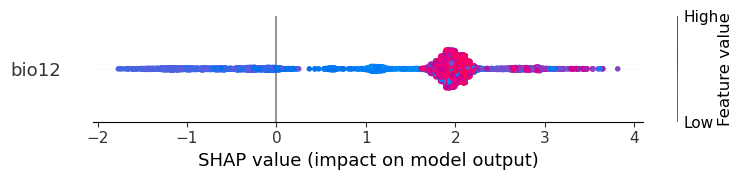

In [18]:
shap.summary_plot(shap_values[:,64:65], X_test.iloc[:, 64:65])

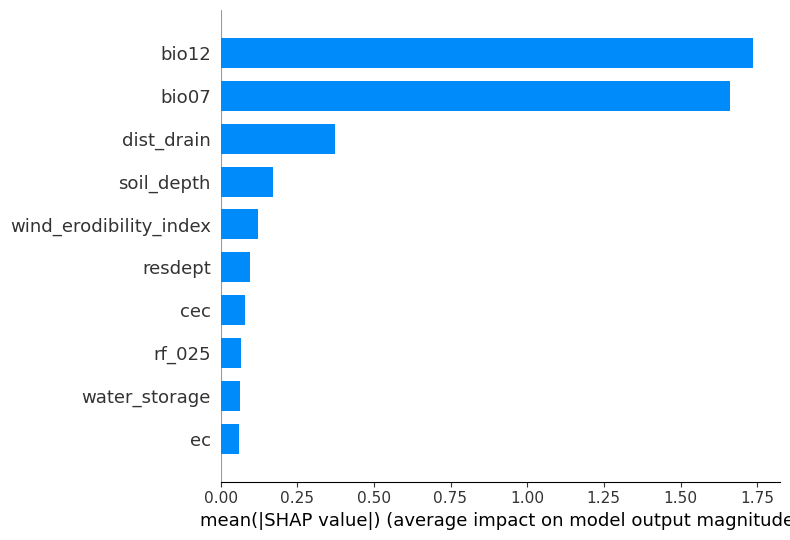

In [19]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10)

In [20]:
shap.initjs()

In [21]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [22]:
shap.force_plot(explainer.expected_value, shap_values[:500,:], X_test.iloc[:500,:])

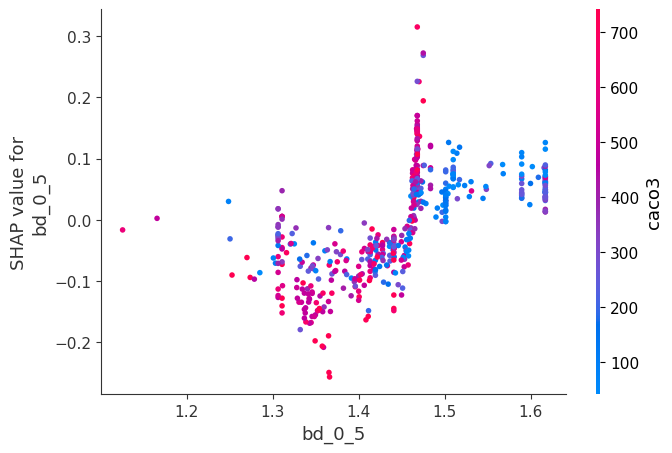

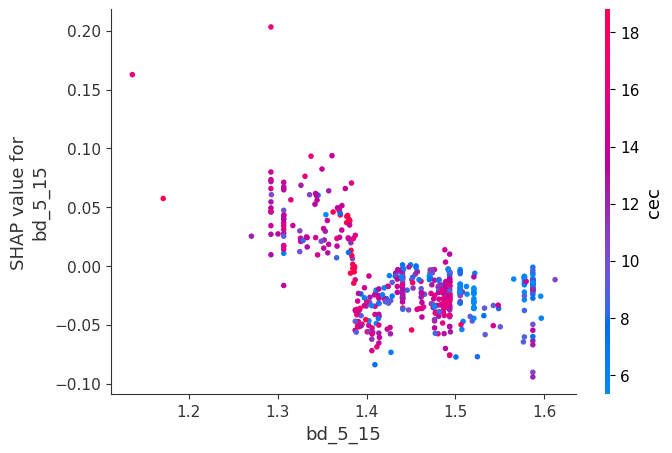

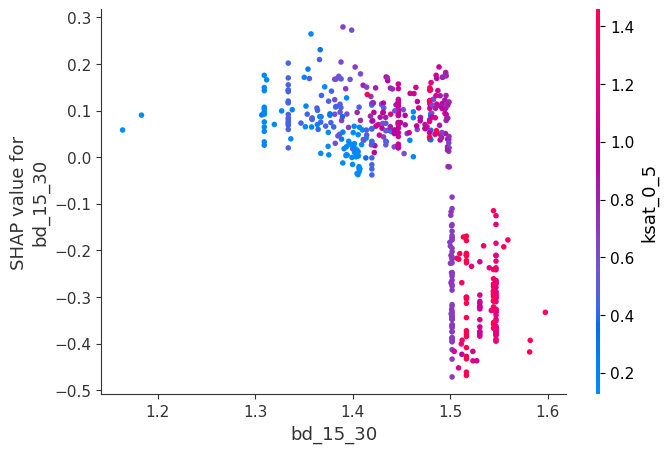

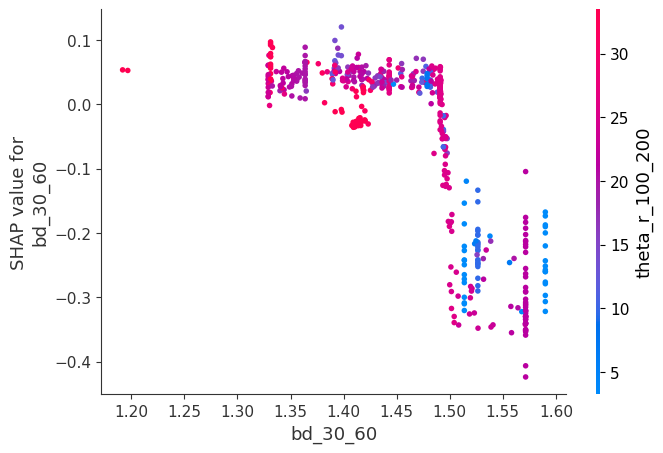

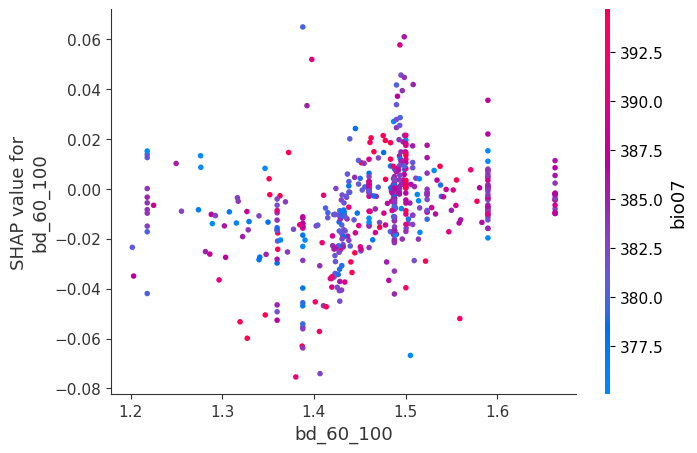

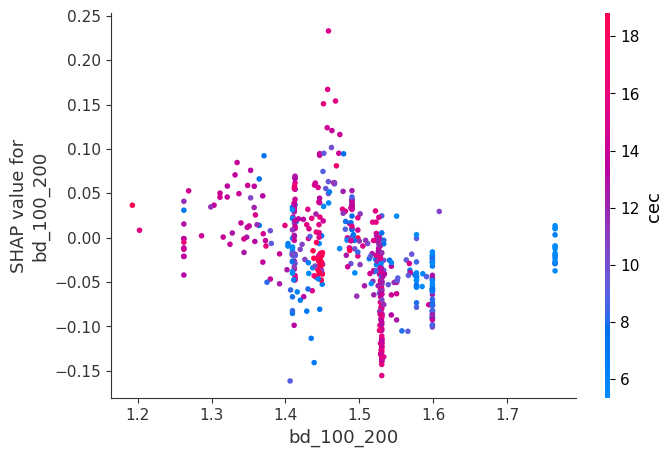

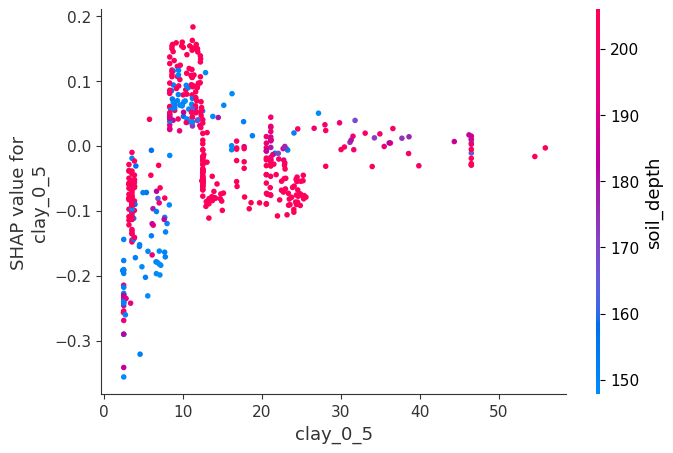

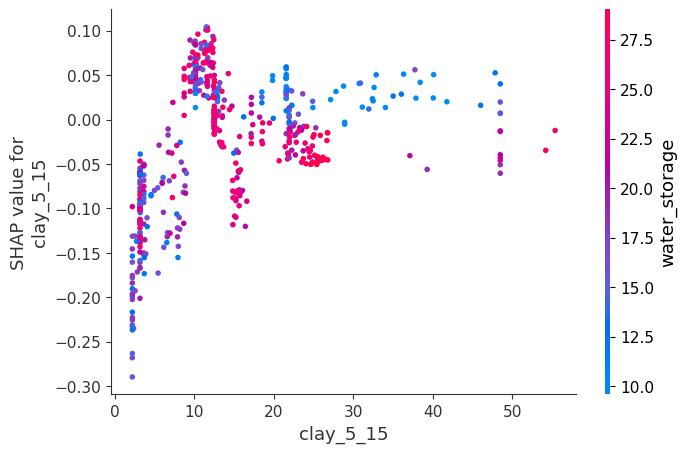

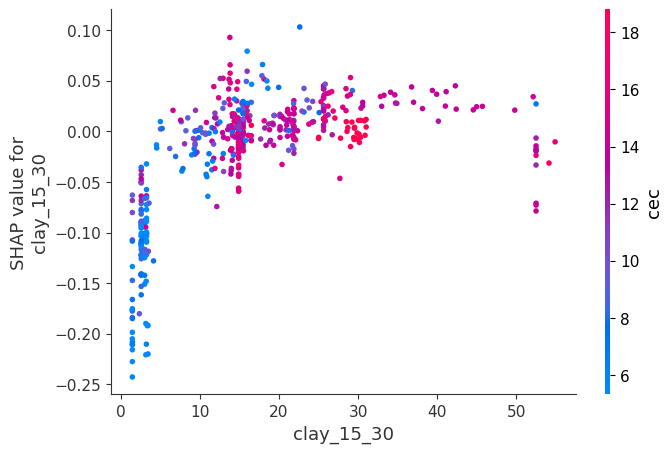

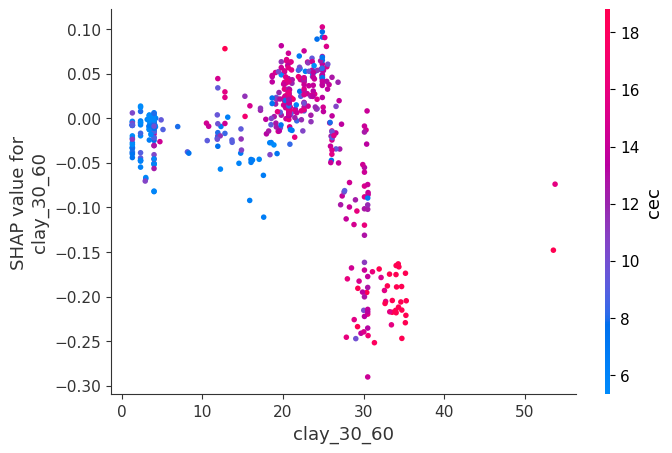

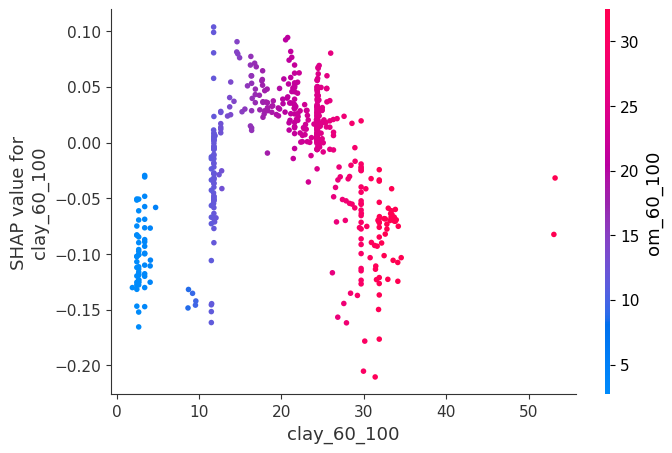

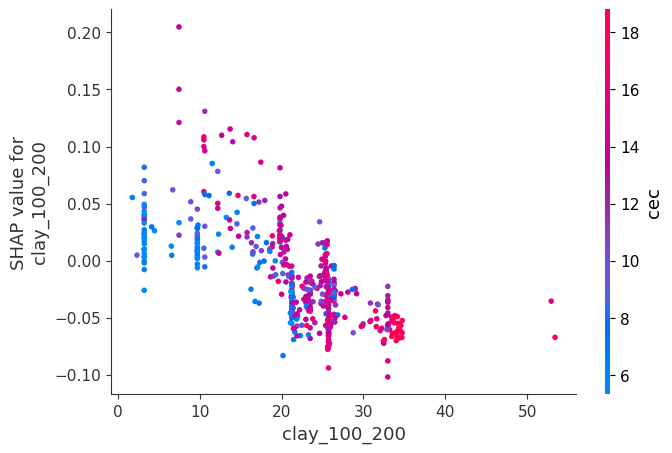

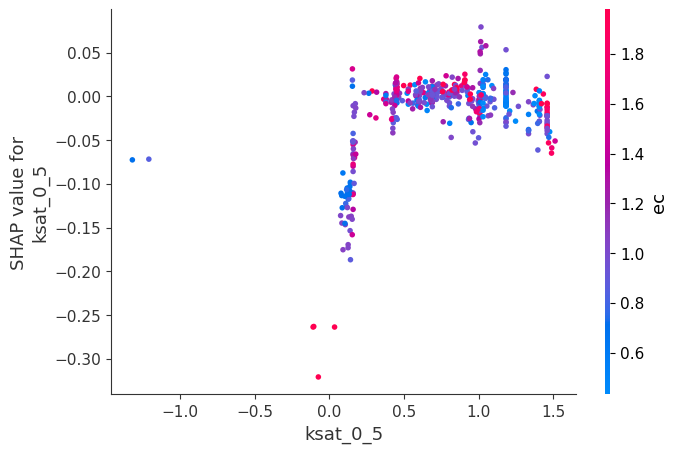

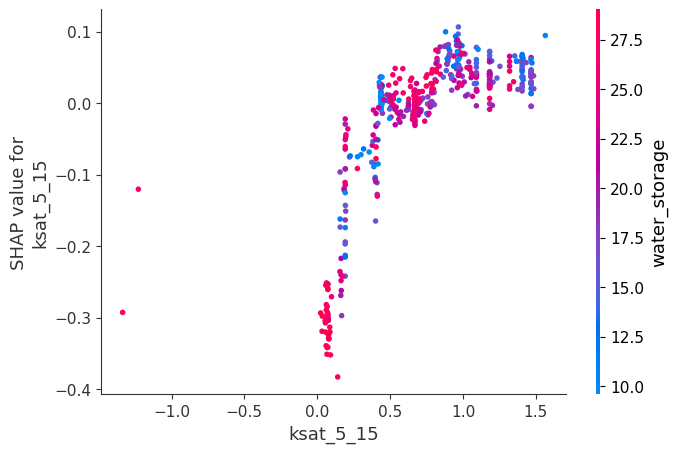

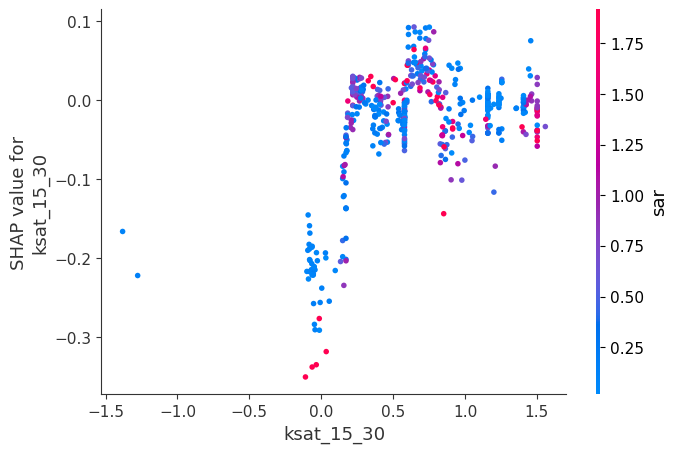

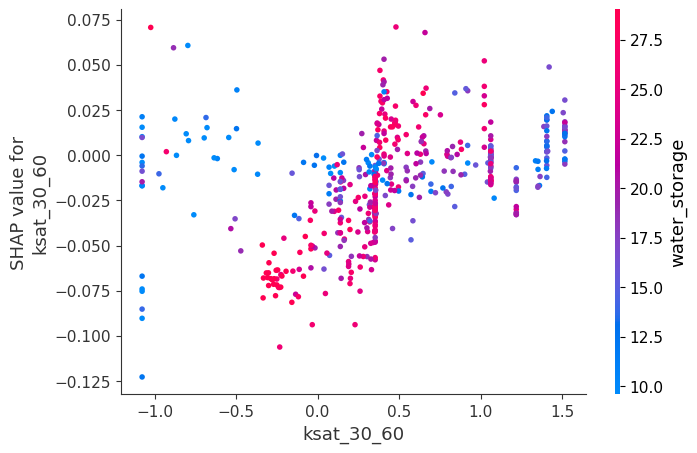

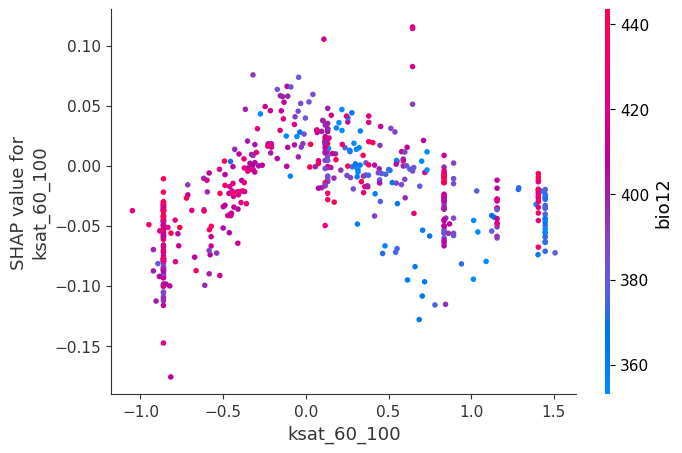

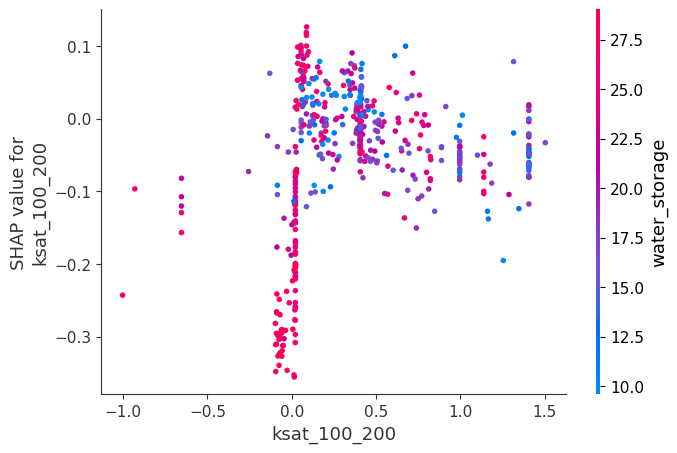

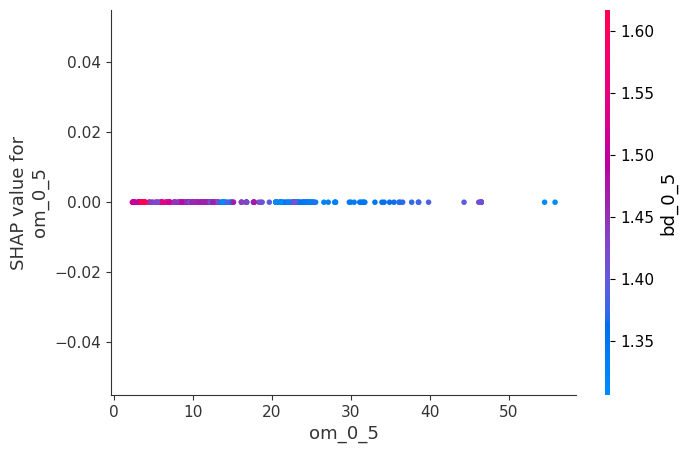

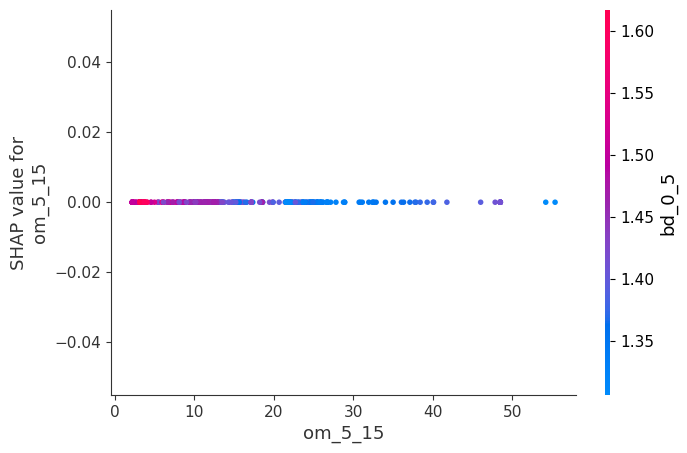

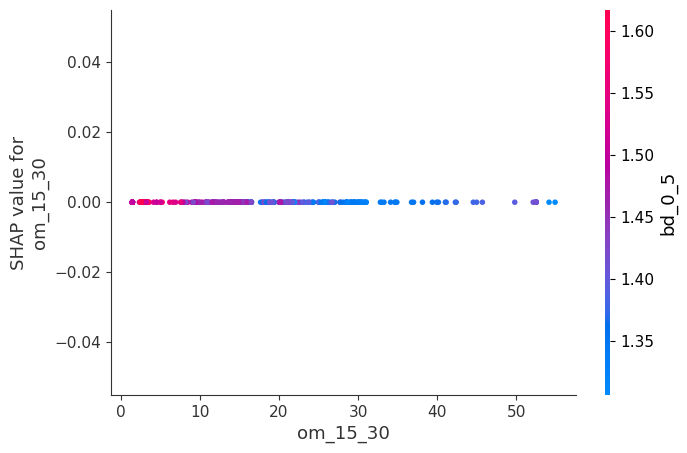

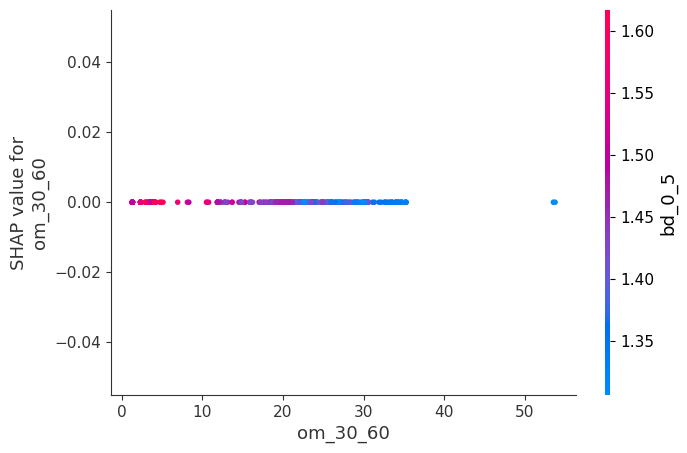

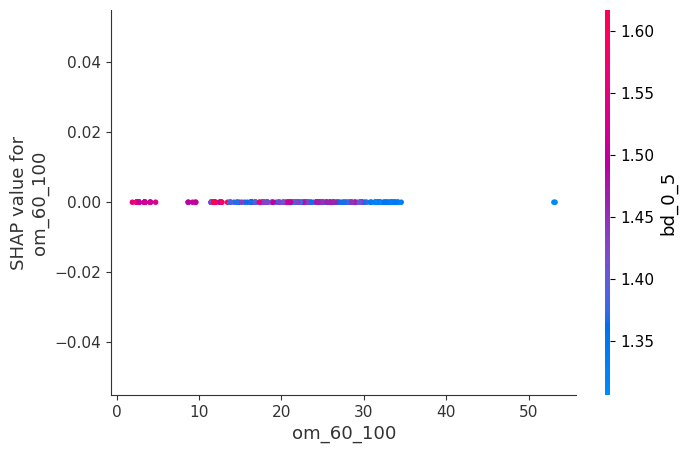

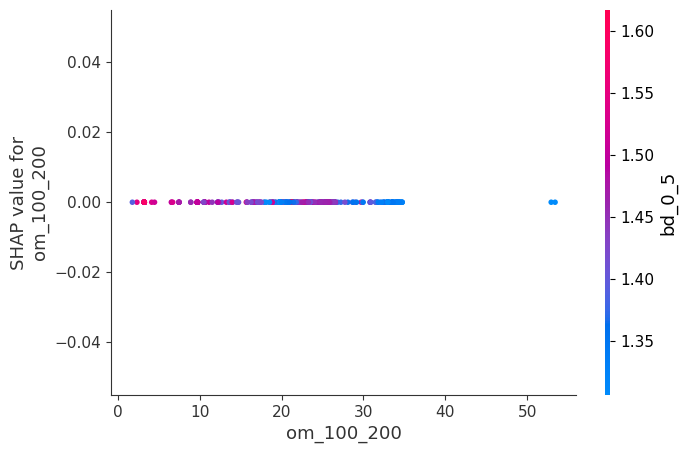

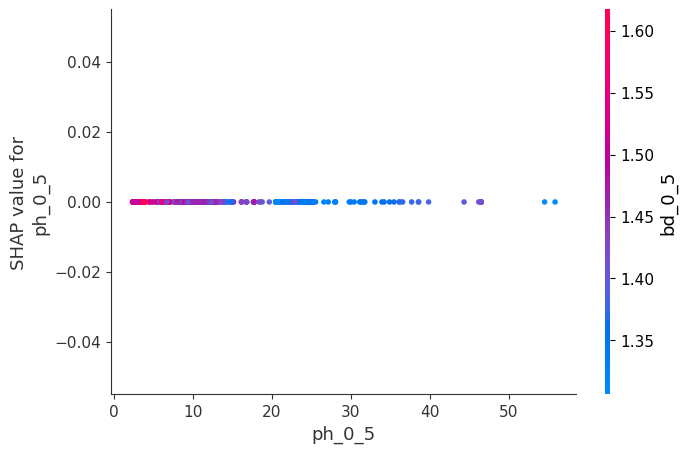

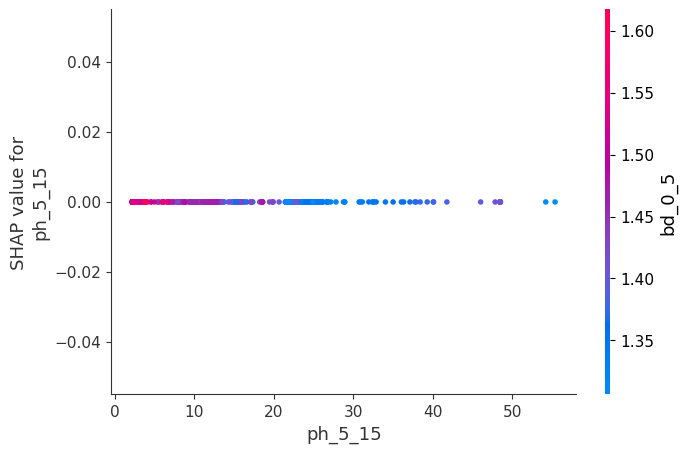

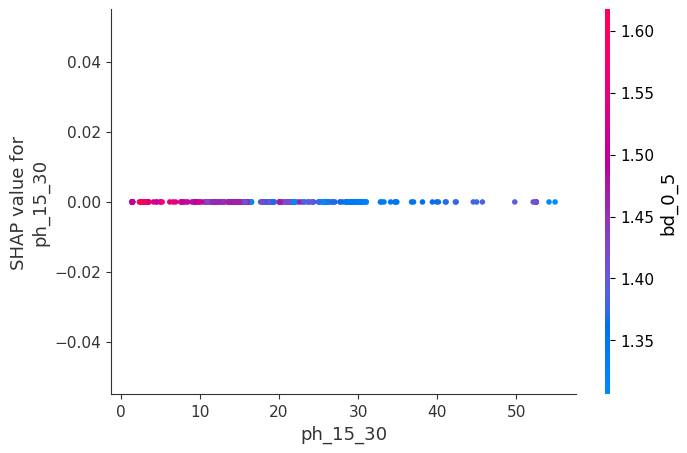

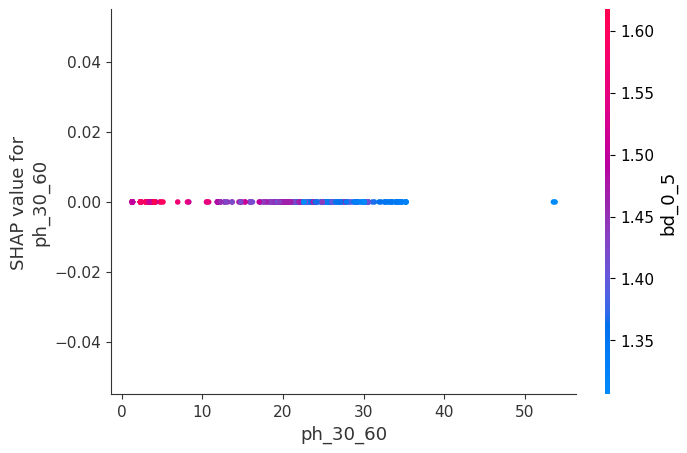

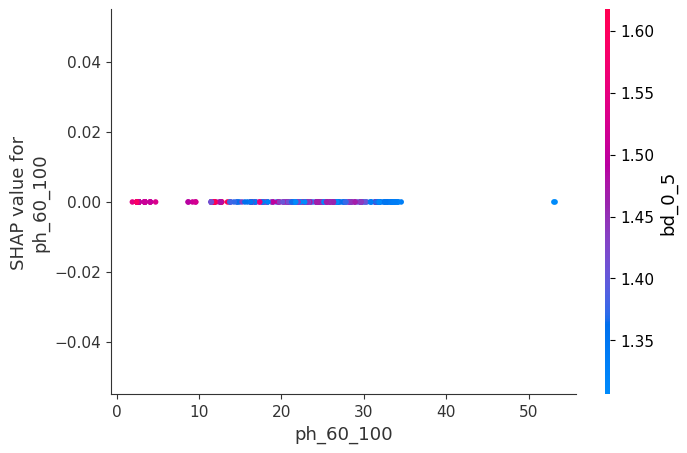

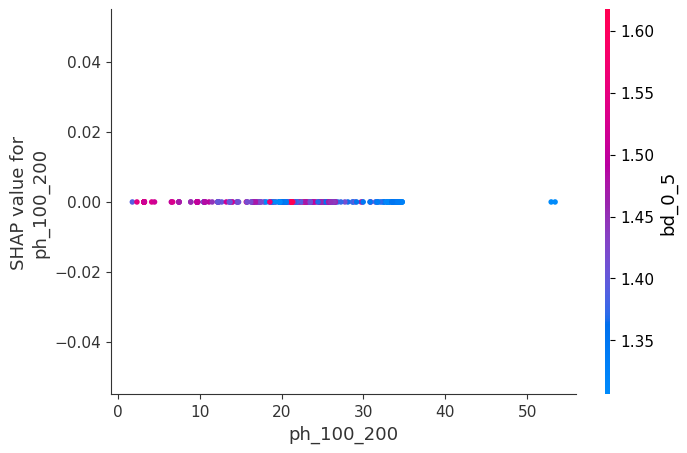

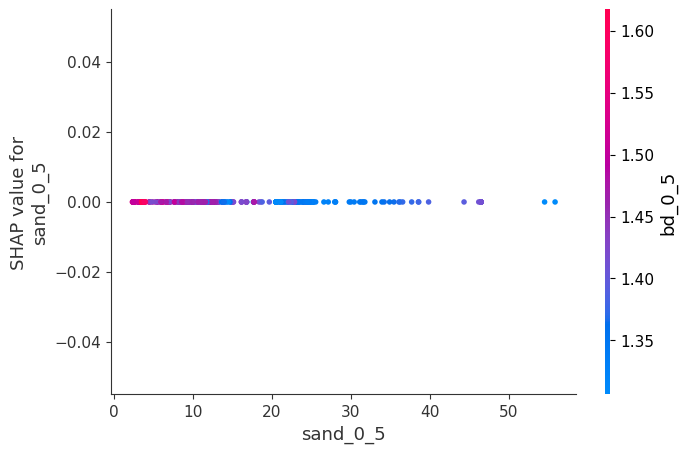

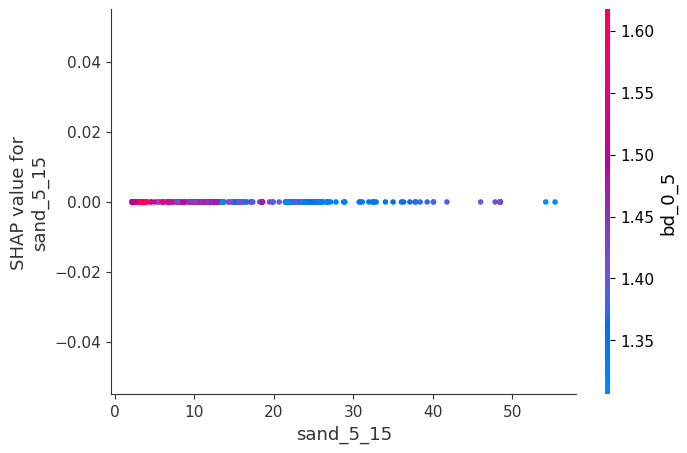

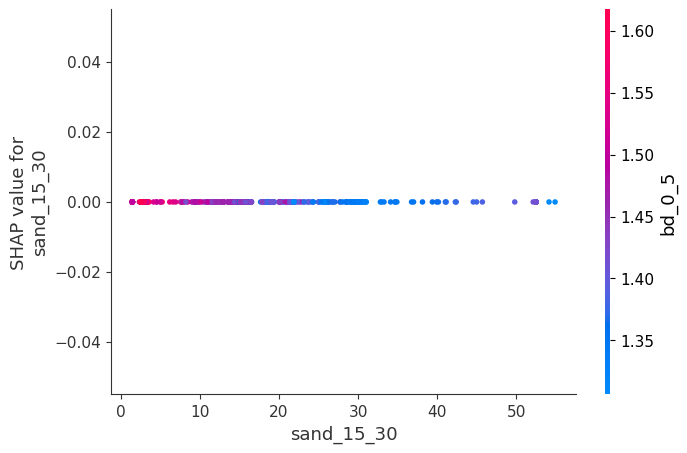

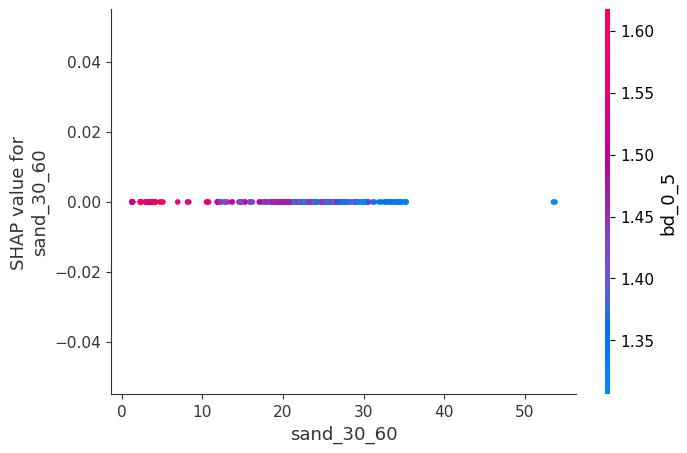

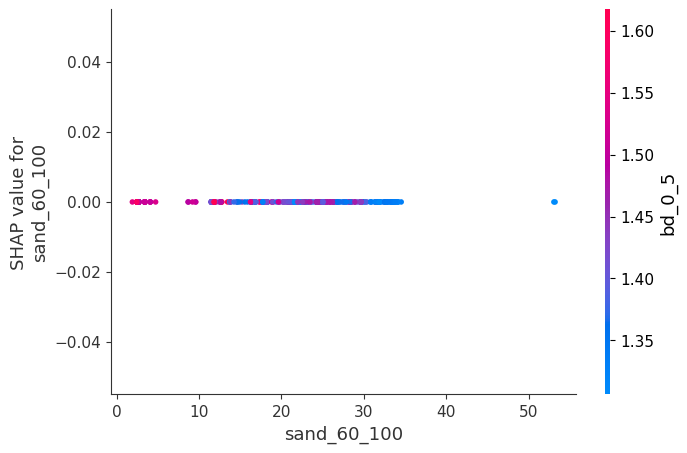

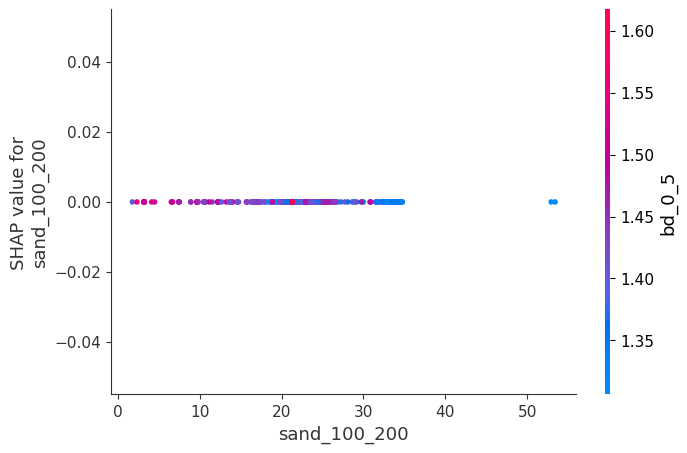

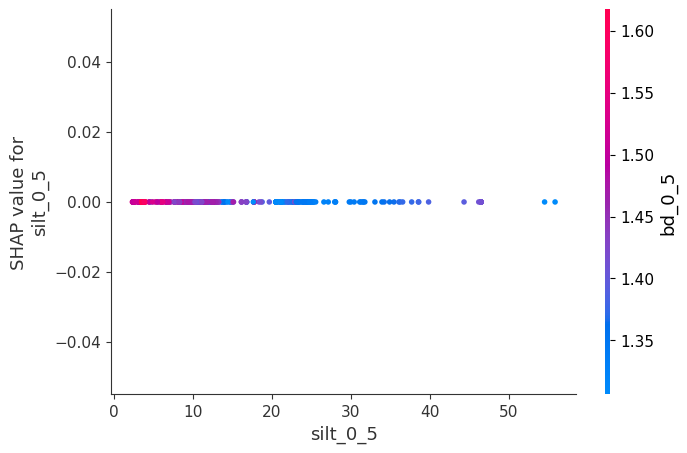

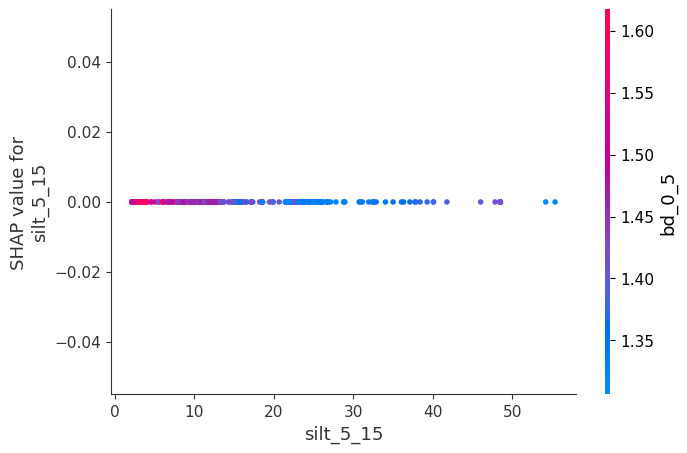

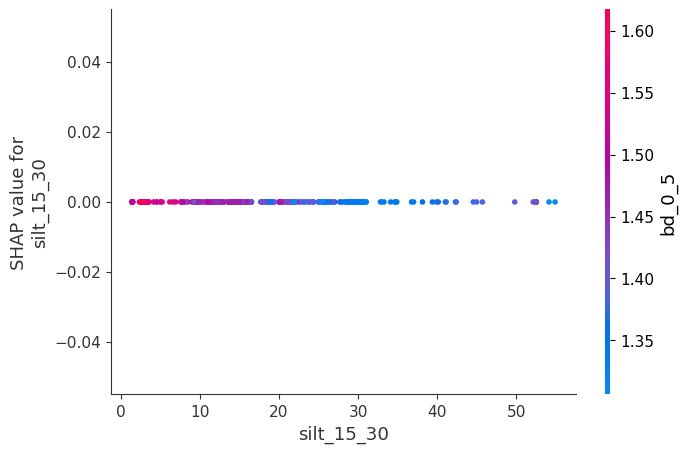

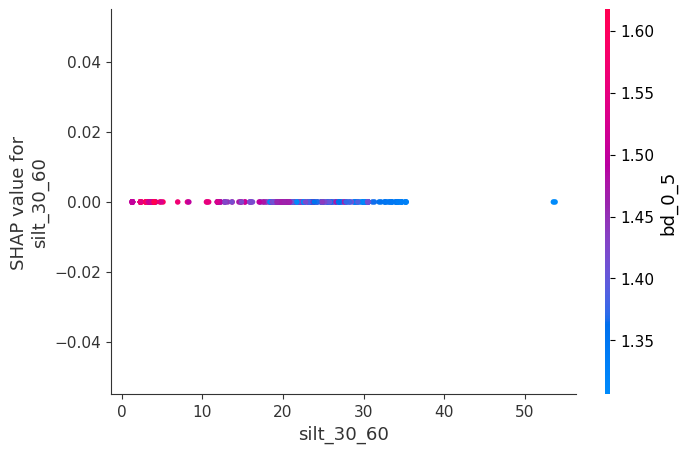

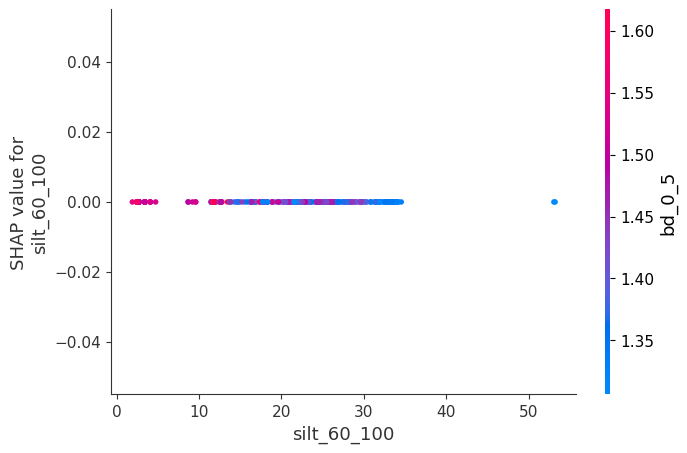

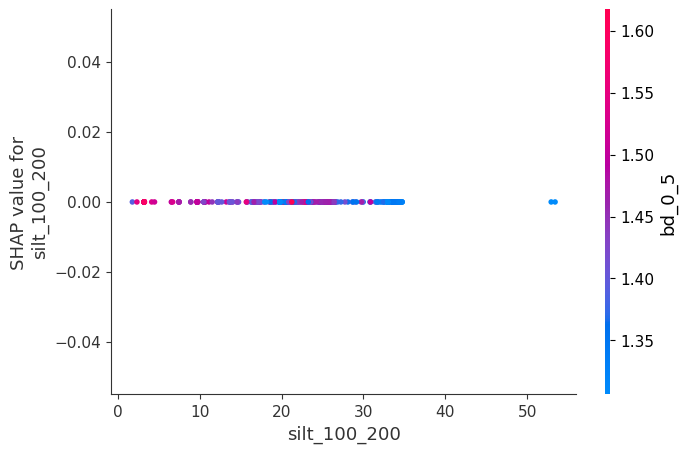

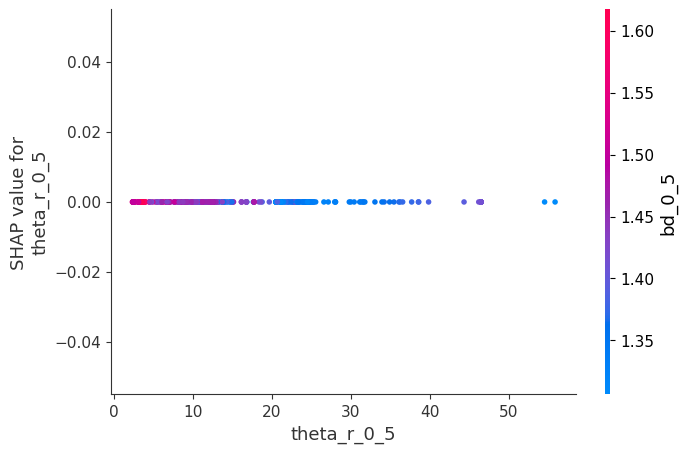

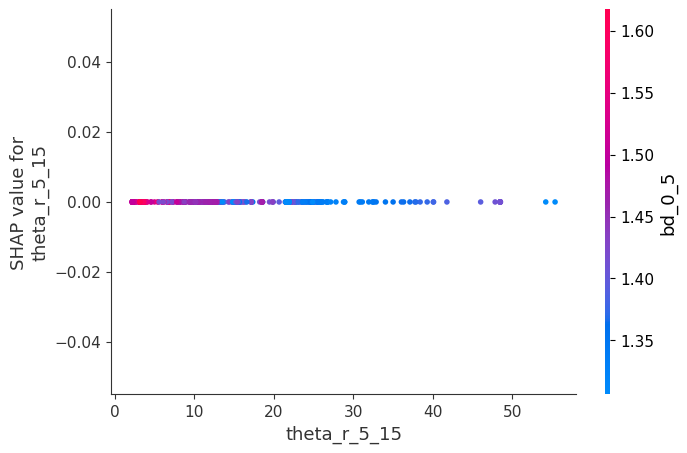

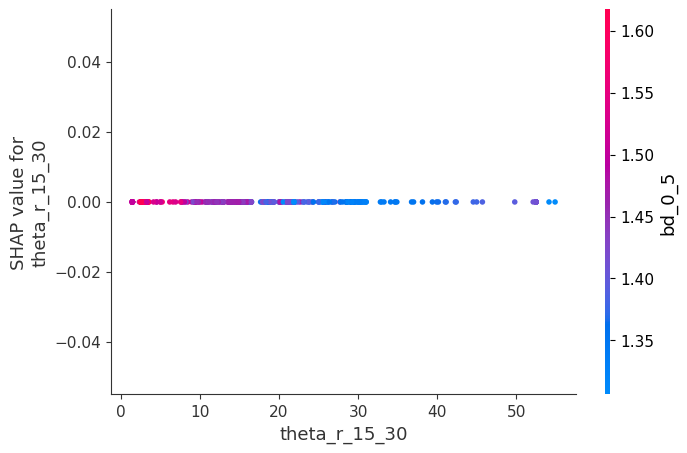

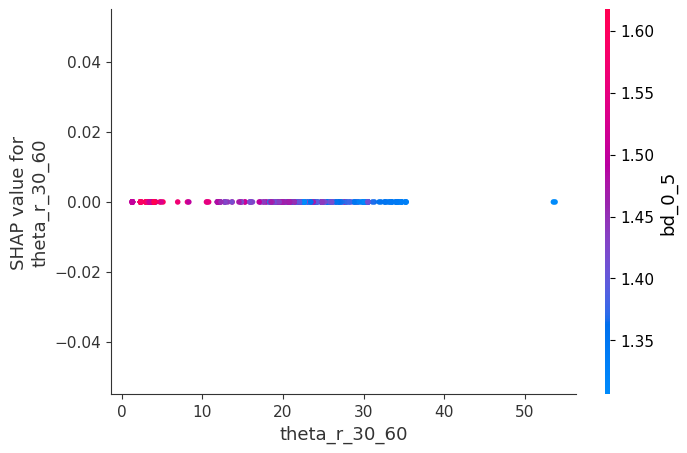

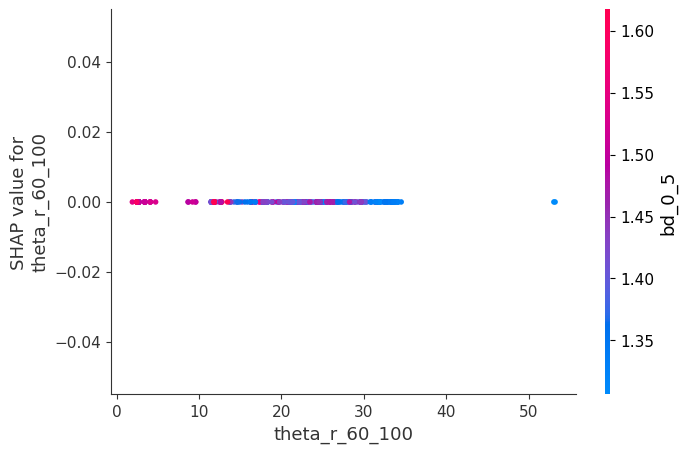

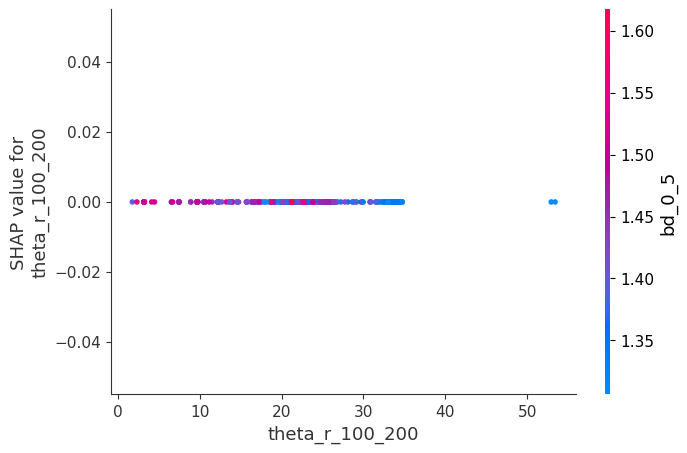

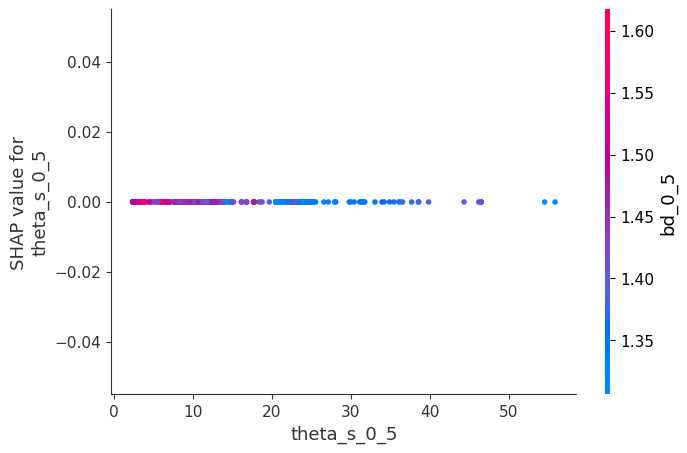

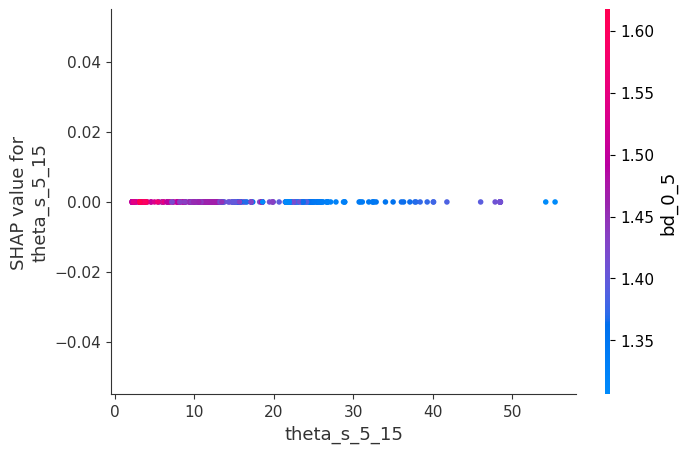

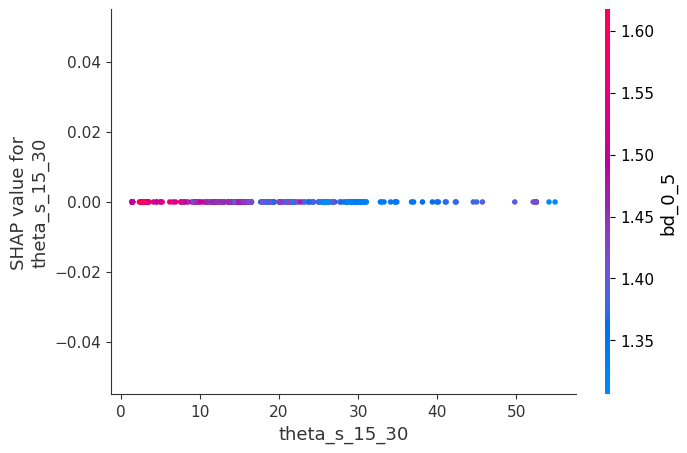

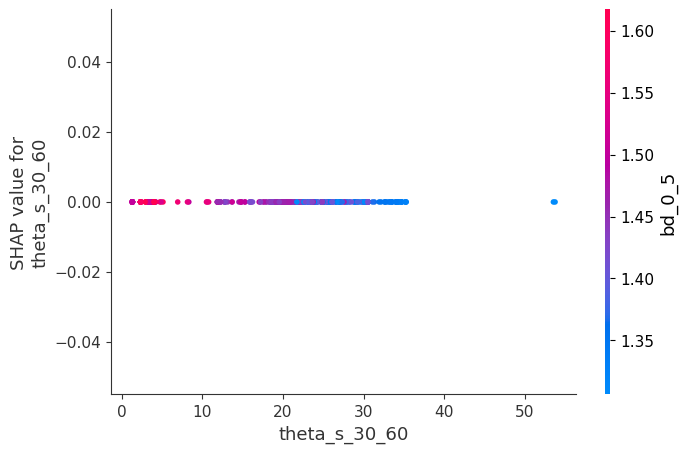

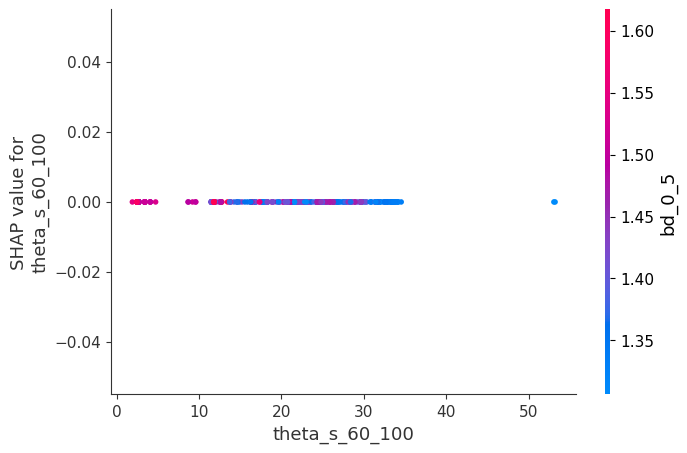

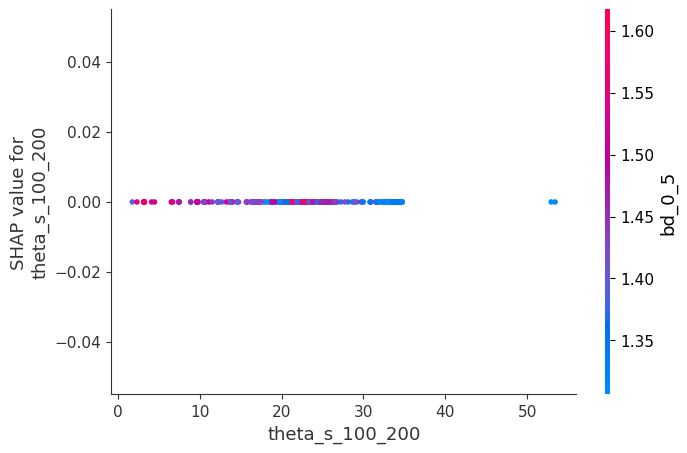

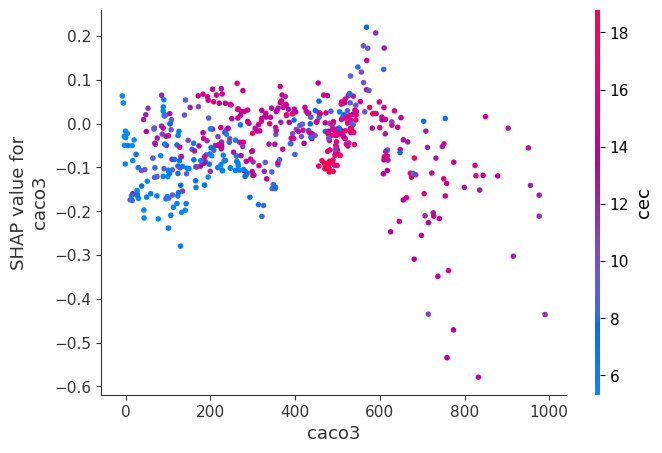

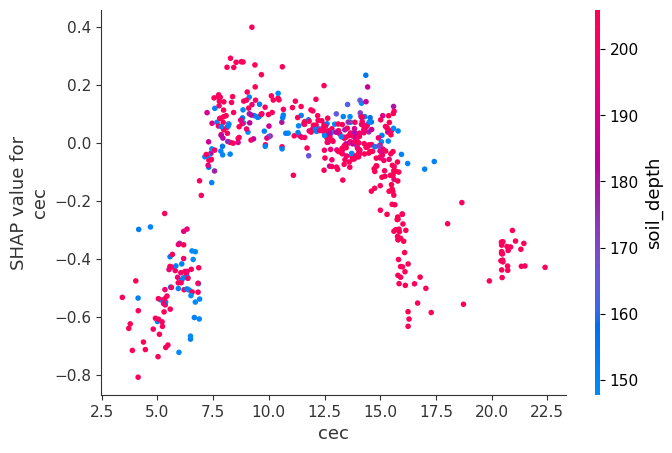

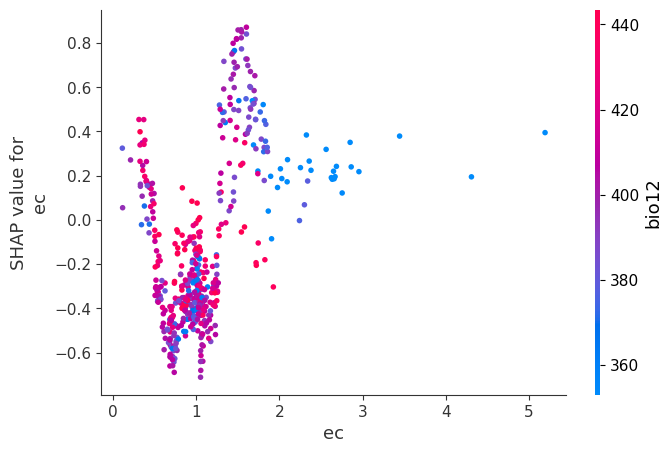

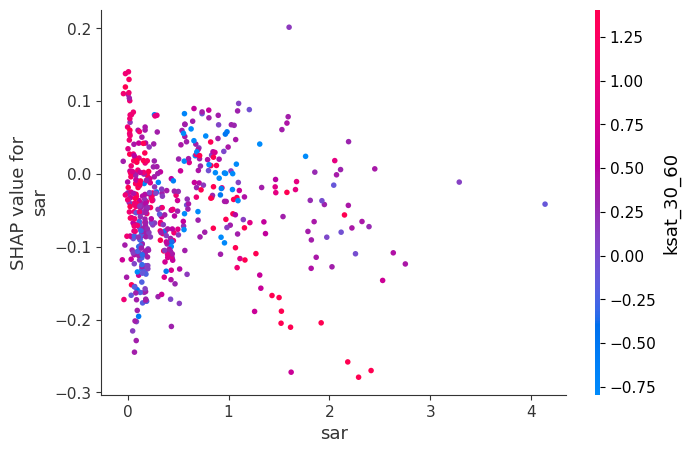

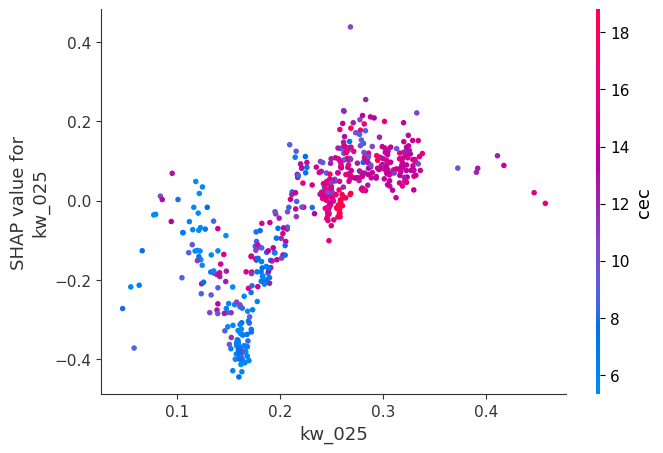

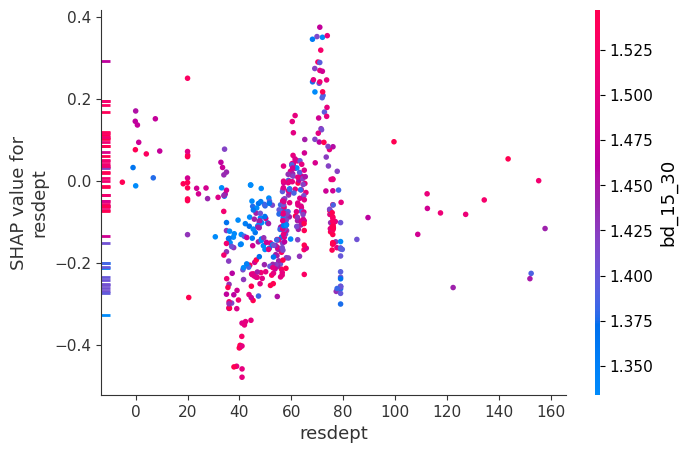

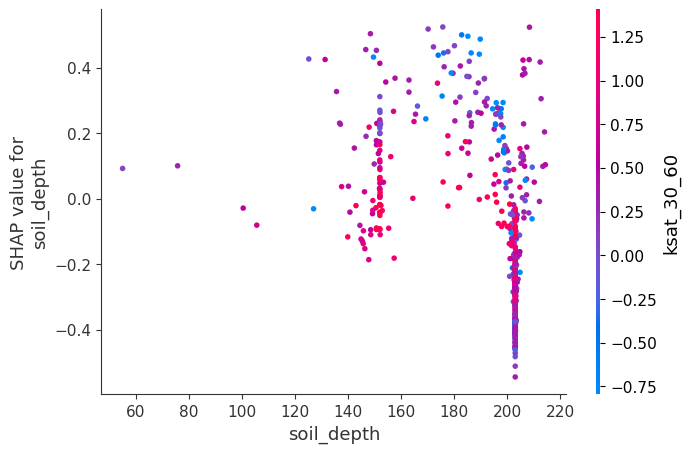

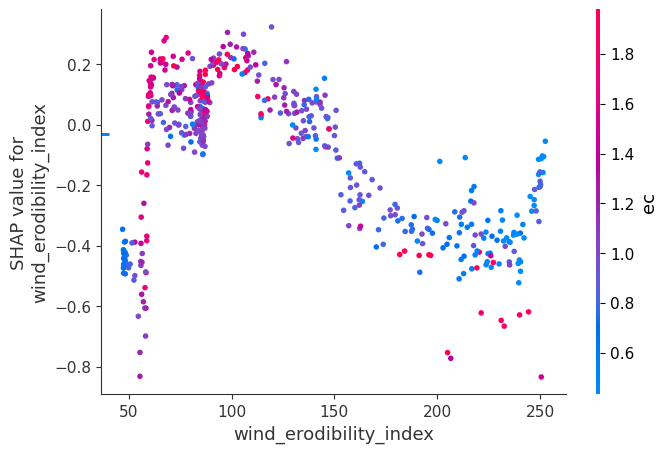

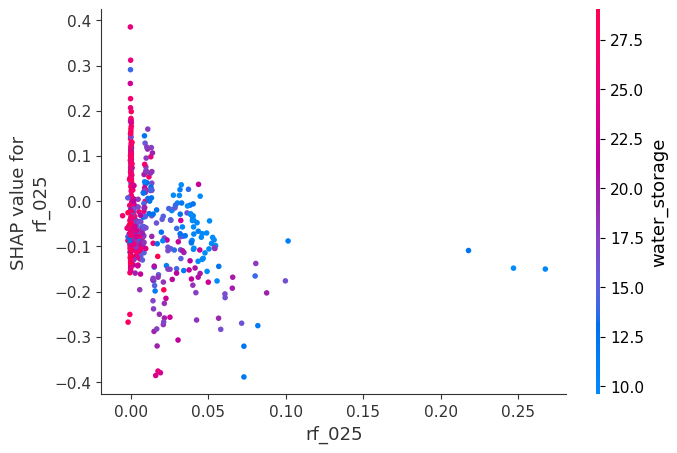

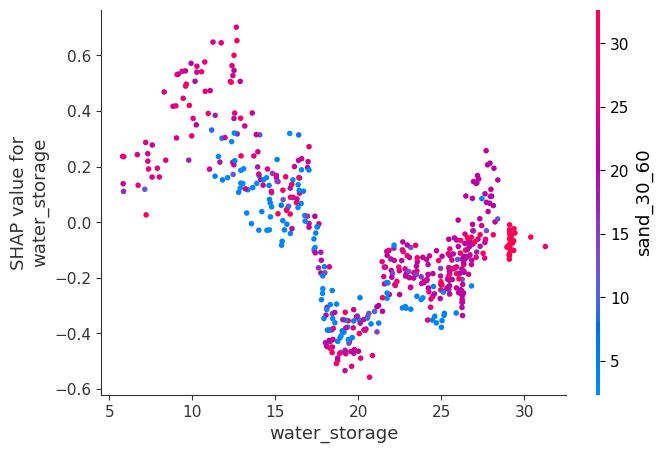

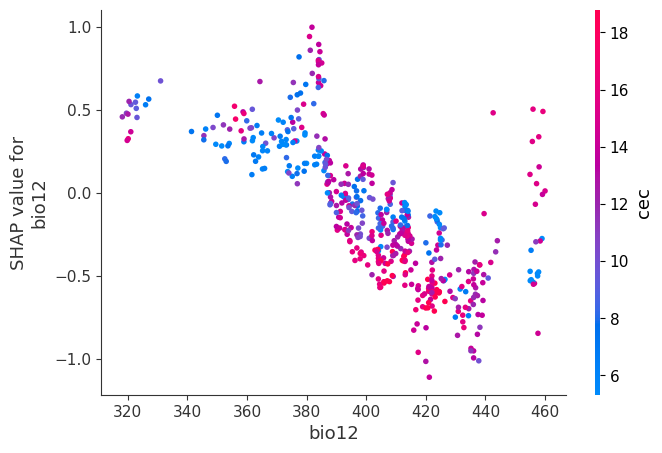

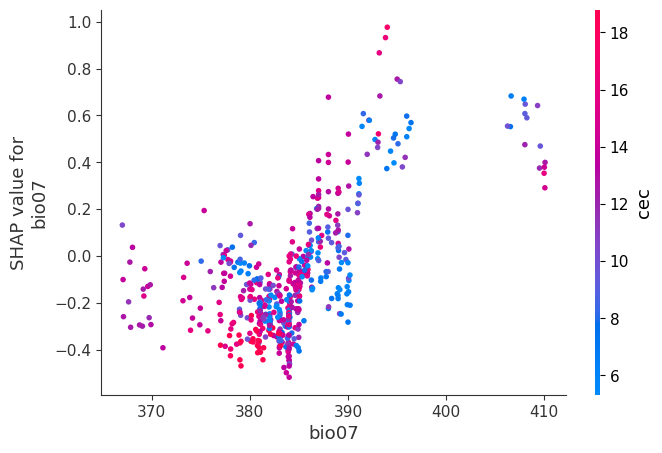

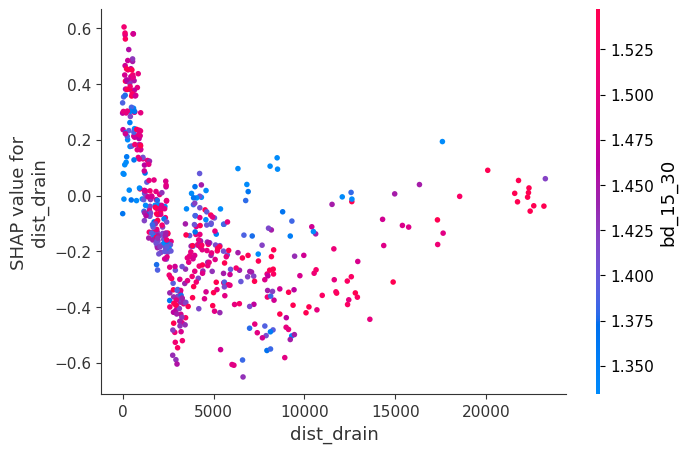

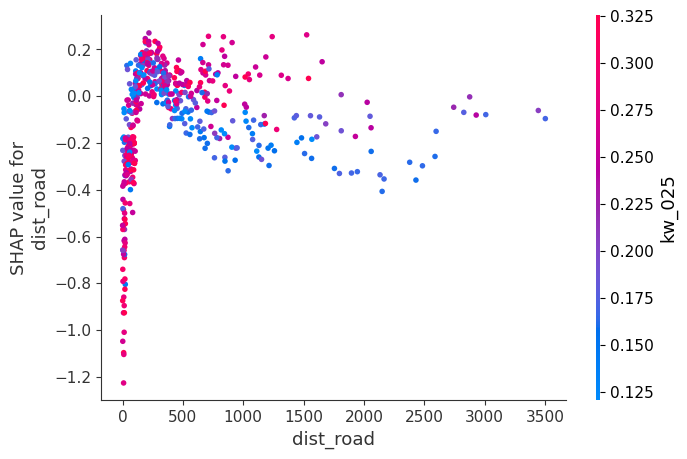

In [104]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_test, display_features=X_test)

In [26]:
explainer.expected_value

0.23583233

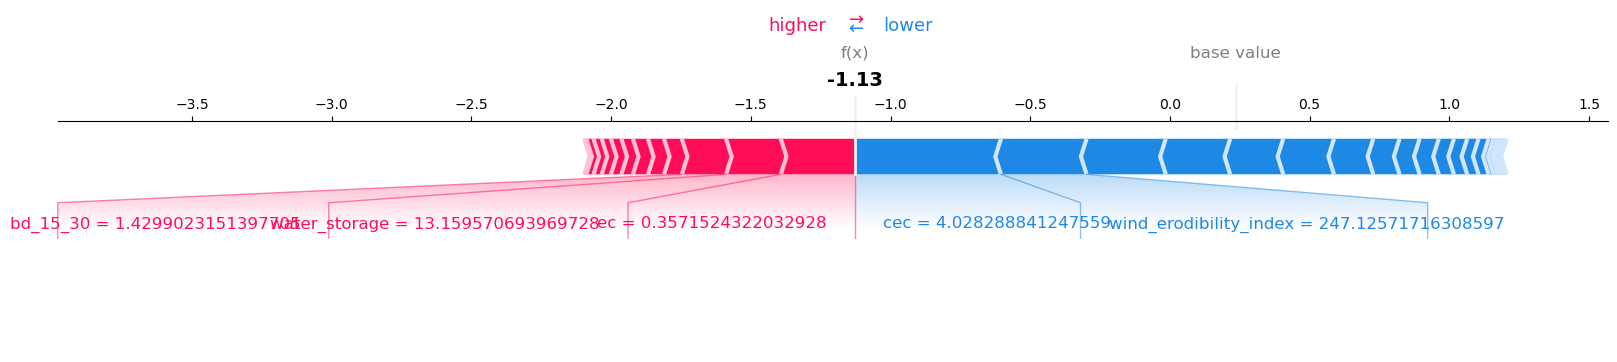

In [61]:
shap.plots.force(explainer.expected_value, shap_values[11,:], X_test.iloc[11, :], matplotlib = True) # can change to represent a row in the testing data

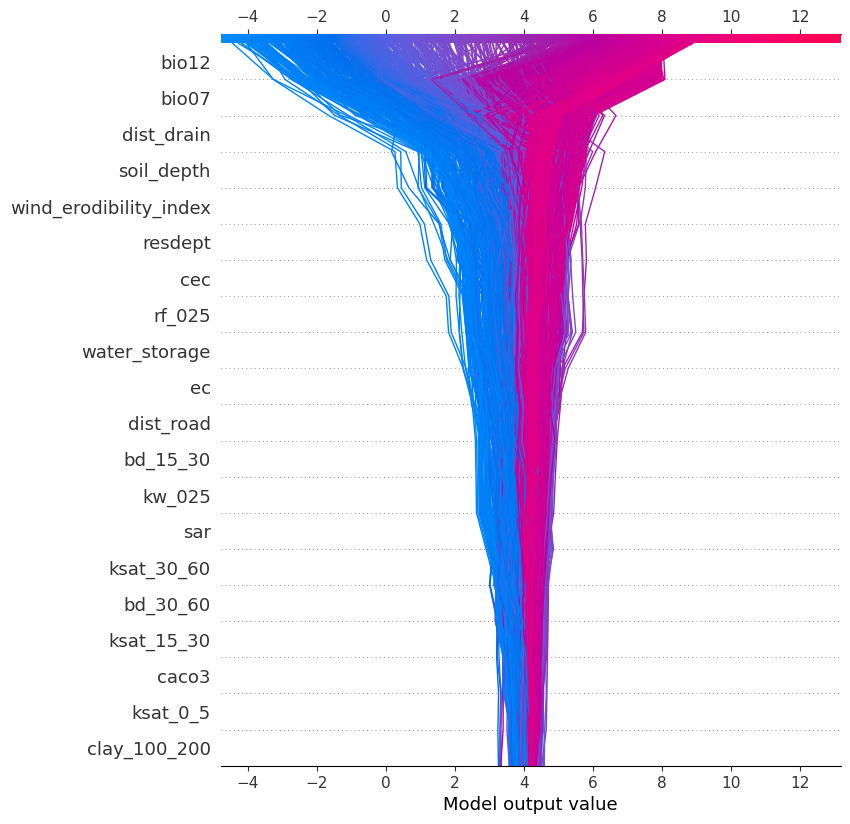

In [24]:
shap.decision_plot(explainer.expected_value, shap_values, X_test.columns, ignore_warnings=True)

# Testing a Random Forests model

In [25]:
# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       398
           1       0.99      0.99      0.99      4327

    accuracy                           0.98      4725
   macro avg       0.94      0.92      0.93      4725
weighted avg       0.98      0.98      0.98      4725



ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was -0.990806, while the model output was 0.921079. If this difference is acceptable you can set check_additivity=False to disable this check.

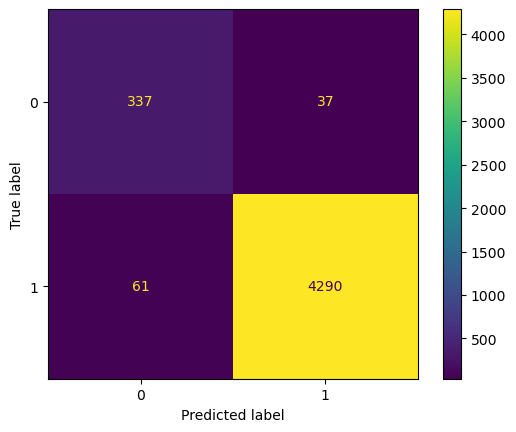

In [26]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)